In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


the dataset link : https://www.kaggle.com/datasets/omkargurav/face-mask-dataset

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Getting the Dataset

In [9]:
# get the dataset from kaggle using API
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:05<00:00, 30.1MB/s]
100% 163M/163M [00:05<00:00, 30.0MB/s]


In [10]:
#extract the composed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('done')
  


done


Import Required libraries

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 # for image processing 
from google.colab.patches import cv2_imshow # to create a new window to show images
from PIL import Image # to read images and do other image processing 
from sklearn.model_selection import train_test_split 

In [12]:
with_mask_imgs = os.listdir('/content/data/with_mask')
without_mask_imgs=os.listdir('/content/data/without_mask')

In [13]:
print("number of with mask images", len(with_mask_imgs))
print("number of without mask images", len(without_mask_imgs))


number of with mask images 3725
number of without mask images 3828


Creating label for the dataset



*   1 >>  that means that the person is wearing a mask

*   0 >>  that means that the person does not wear a mask



In [14]:
# create the labels

with_mask_label = [1]*3725
without_mask_label =[0]*3828

In [15]:
print(with_mask_label[0:5])
print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
# combine the tow sets
label =with_mask_label+without_mask_label

In [17]:
print(len(label))

7553


**View The Images**

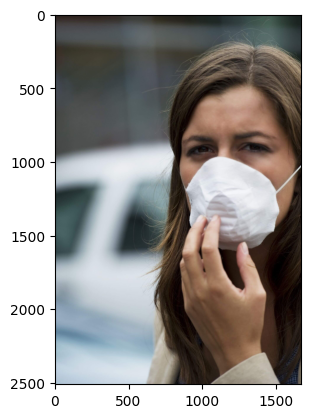

In [18]:
img = mpimg.imread('/content/data/with_mask/with_mask_3357.jpg')
imgplot =plt.imshow(img)
plt.show()

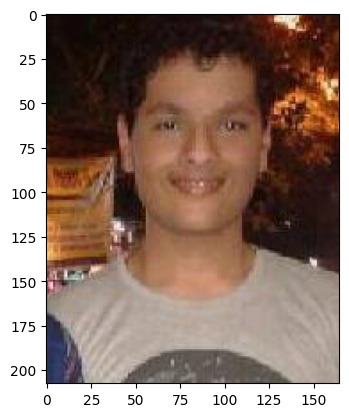

In [19]:
img = mpimg.imread('/content/data/without_mask/without_mask_1333.jpg')
imgplot =plt.imshow(img)
plt.show()

Image Processing

*   first we need to resize the images
*  first we need to resize the images





In [20]:

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_imgs:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_imgs:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
len(data)

7553

In [21]:
type(data)

list

In [22]:
data[0]

array([[[201, 189, 193],
        [201, 189, 193],
        [201, 189, 193],
        ...,
        [198, 186, 190],
        [198, 186, 190],
        [198, 186, 190]],

       [[201, 189, 193],
        [201, 189, 193],
        [201, 189, 193],
        ...,
        [198, 186, 190],
        [198, 186, 190],
        [198, 186, 190]],

       [[201, 189, 193],
        [201, 189, 193],
        [201, 189, 193],
        ...,
        [198, 186, 190],
        [198, 186, 190],
        [198, 186, 190]],

       ...,

       [[204, 192, 202],
        [204, 192, 202],
        [205, 193, 203],
        ...,
        [201, 190, 198],
        [203, 192, 200],
        [201, 190, 198]],

       [[204, 192, 203],
        [204, 192, 203],
        [205, 193, 204],
        ...,
        [201, 190, 198],
        [203, 192, 200],
        [201, 190, 198]],

       [[204, 192, 203],
        [204, 192, 203],
        [205, 193, 204],
        ...,
        [201, 190, 198],
        [202, 191, 199],
        [201, 190, 198]]

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(128, 128, 3)

In [21]:
# converting image list and lable list to numpy array

x= np.array(data)
y= np.array(label)

In [22]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


Train Test Split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
print(x.shape, x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


Scale the data

In [25]:
x_train_scaled = x_train/255
x_test_scaled =x_test/255

In [26]:
x_train[0]

array([[[  0,  72,  82],
        [  4,  78,  89],
        [ 14,  86,  98],
        ...,
        [  9,   1,   8],
        [  6,   2,  17],
        [  9,   7,  12]],

       [[  0,  73,  82],
        [  3,  80,  89],
        [ 14,  86,  98],
        ...,
        [  8,   2,  19],
        [  5,   2,  26],
        [  6,   6,  17]],

       [[  0,  73,  84],
        [  4,  79,  92],
        [ 14,  87, 101],
        ...,
        [  1,   1,  21],
        [  2,   2,  23],
        [  1,   7,  16]],

       ...,

       [[248, 248, 248],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [187, 206, 208],
        [186, 205, 206],
        [185, 204, 205]],

       [[249, 249, 249],
        [250, 250, 250],
        [252, 252, 252],
        ...,
        [185, 203, 205],
        [184, 202, 204],
        [183, 201, 203]],

       [[249, 249, 249],
        [250, 250, 250],
        [252, 252, 252],
        ...,
        [183, 203, 204],
        [182, 202, 203],
        [181, 201, 202]]

In [32]:
x_train_scaled[0]

array([[[0.        , 0.28235294, 0.32156863],
        [0.01568627, 0.30588235, 0.34901961],
        [0.05490196, 0.3372549 , 0.38431373],
        ...,
        [0.03529412, 0.00392157, 0.03137255],
        [0.02352941, 0.00784314, 0.06666667],
        [0.03529412, 0.02745098, 0.04705882]],

       [[0.        , 0.28627451, 0.32156863],
        [0.01176471, 0.31372549, 0.34901961],
        [0.05490196, 0.3372549 , 0.38431373],
        ...,
        [0.03137255, 0.00784314, 0.0745098 ],
        [0.01960784, 0.00784314, 0.10196078],
        [0.02352941, 0.02352941, 0.06666667]],

       [[0.        , 0.28627451, 0.32941176],
        [0.01568627, 0.30980392, 0.36078431],
        [0.05490196, 0.34117647, 0.39607843],
        ...,
        [0.00392157, 0.00392157, 0.08235294],
        [0.00784314, 0.00784314, 0.09019608],
        [0.00392157, 0.02745098, 0.0627451 ]],

       ...,

       [[0.97254902, 0.97254902, 0.97254902],
        [0.97647059, 0.97647059, 0.97647059],
        [0.98431373, 0

Building a convolutional Neural Network  Model

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image

In [28]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [29]:
# compile the NN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

Train the CNN model

In [30]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 16s 22ms/step - loss: 0.4698 - acc: 0.7935 - val_loss: 0.2298 - val_acc: 0.9124
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2798 - acc: 0.8878 - val_loss: 0.2217 - val_acc: 0.9240
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2513 - acc: 0.8985 - val_loss: 0.1377 - val_acc: 0.9471
Epoch 4/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1992 - acc: 0.9246 - val_loss: 0.1193 - val_acc: 0.9587
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1928 - acc: 0.9270 - val_loss: 0.1228 - val_acc: 0.9570


Evaluate the model

In [31]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 12ms/step - loss: 0.2158 - acc: 0.9226
Test Accuracy = 0.9225678443908691


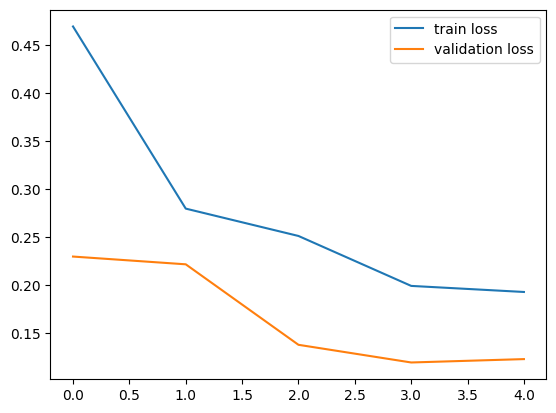

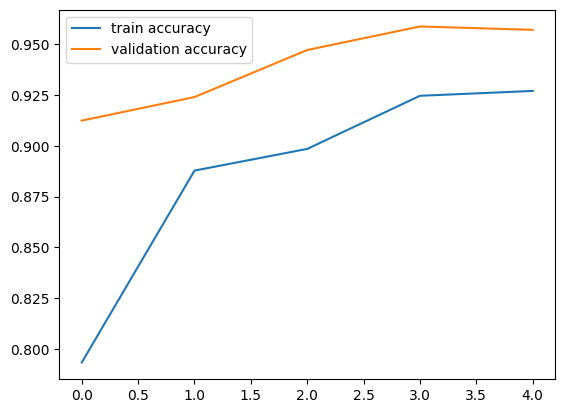

In [32]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Build the Predictive System

Path of the image to be predicted: /content/istockphoto-1272058180-612x612.jpg


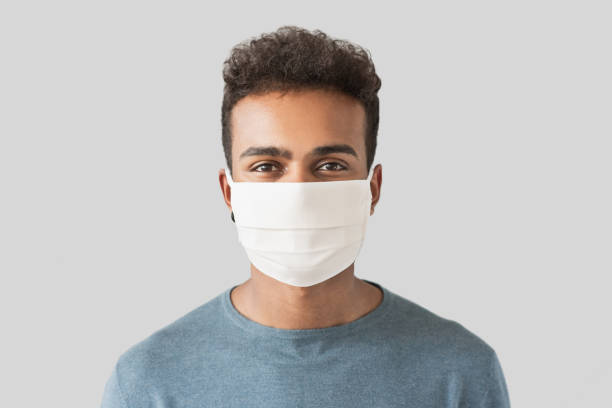

1/1 [==============================] - 0s 246ms/step
[[0.4521796  0.58006334]]
1
The person in the image is wearing a mask


In [33]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/تنزيل (1).jfif


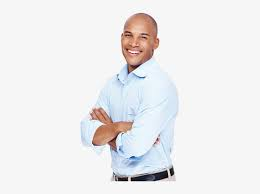

1/1 [==============================] - 0s 23ms/step
[[0.5975022  0.40936553]]
0
The person in the image is not wearing a mask


In [35]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/png-transparent-african-american-graphy-thought-thinking-man-miscellaneous-photography-people.png


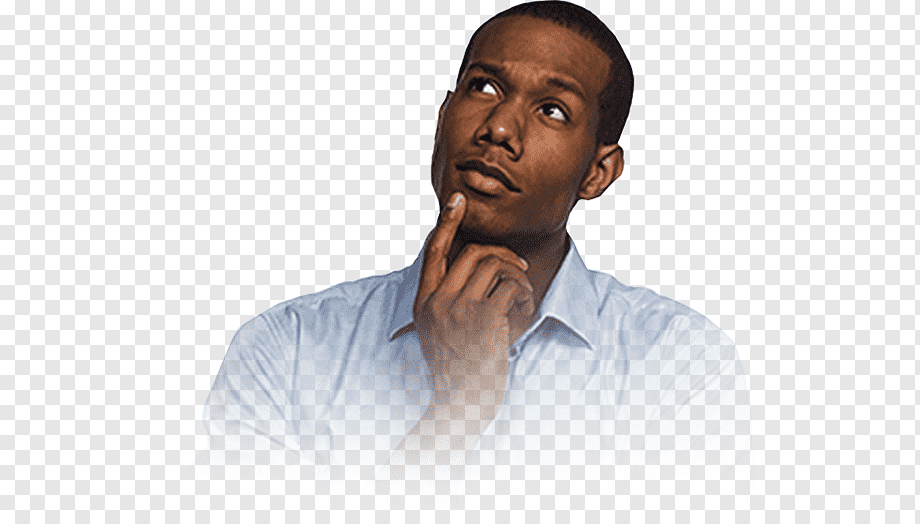

1/1 [==============================] - 0s 30ms/step
[[0.5608608  0.45529786]]
0
The person in the image is not wearing a mask


In [36]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')